# Online Meal Delivery Demand Forecast

In [52]:
pip install statsmodels


     ---------------------------------------- 9.1/9.1 MB 2.3 MB/s eta 0:00:00
     -------------------------------------- 233.8/233.8 kB 1.4 MB/s eta 0:00:00



[notice] A new release of pip available: 22.3 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [53]:
#Load required Libraries

import pandas as pd
import numpy as np
import statsmodels


### Loading data

In [2]:
#Loading data - each dataset
#Order details
orders = pd.read_csv("train.csv")
#Meal information details
meal_info = pd.read_csv("meal_info.csv")
#Fulfillment center details
fulfillment = pd.read_csv("fulfilment_center_info.csv")

### Data Understanding

In [3]:
print(type(orders))
print(type(fulfillment))
print(type(meal_info))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [4]:
#Checking data with few lines to understand indepent variables
orders.head(3)


,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189


In [5]:
#Checking data with few lines to understand indepent variables
meal_info.head(3)

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai


In [6]:
#Checking data with few lines to understand indepent variables
fulfillment.head(3)

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0


# Data Pre-processing

### Data cleaning

In [7]:
#Joining data 

orders_meal = pd.merge(orders, fulfillment, on='center_id', how='left')

In [8]:
#Joining data 

orders_full = pd.merge(orders_meal, meal_info, on='meal_id', how='left')

In [9]:
#To check the data after joining each data set
orders_full.head(3)

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,center_type,op_area,category,cuisine
0,1379560,1,55,1885,136.83,152.29,0,0,177,647,56,TYPE_C,2.0,Beverages,Thai
1,1466964,1,55,1993,136.83,135.83,0,0,270,647,56,TYPE_C,2.0,Beverages,Thai
2,1346989,1,55,2539,134.86,135.86,0,0,189,647,56,TYPE_C,2.0,Beverages,Thai


In [10]:
#Exporting to csv file to view the data/For easy use in future
orders_full.to_csv("fulldata.csv")

## Exploratory Data Analysis

In [11]:
#To check the summary of the data
orders_full.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000,456548.000000,456548.000000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760,601.553399,56.614566,4.083590
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798,66.195914,17.641306,1.091686
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000,456.000000,23.000000,0.900000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000,553.000000,34.000000,3.600000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000,596.000000,56.000000,4.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000,651.000000,77.000000,4.500000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000,713.000000,93.000000,7.000000


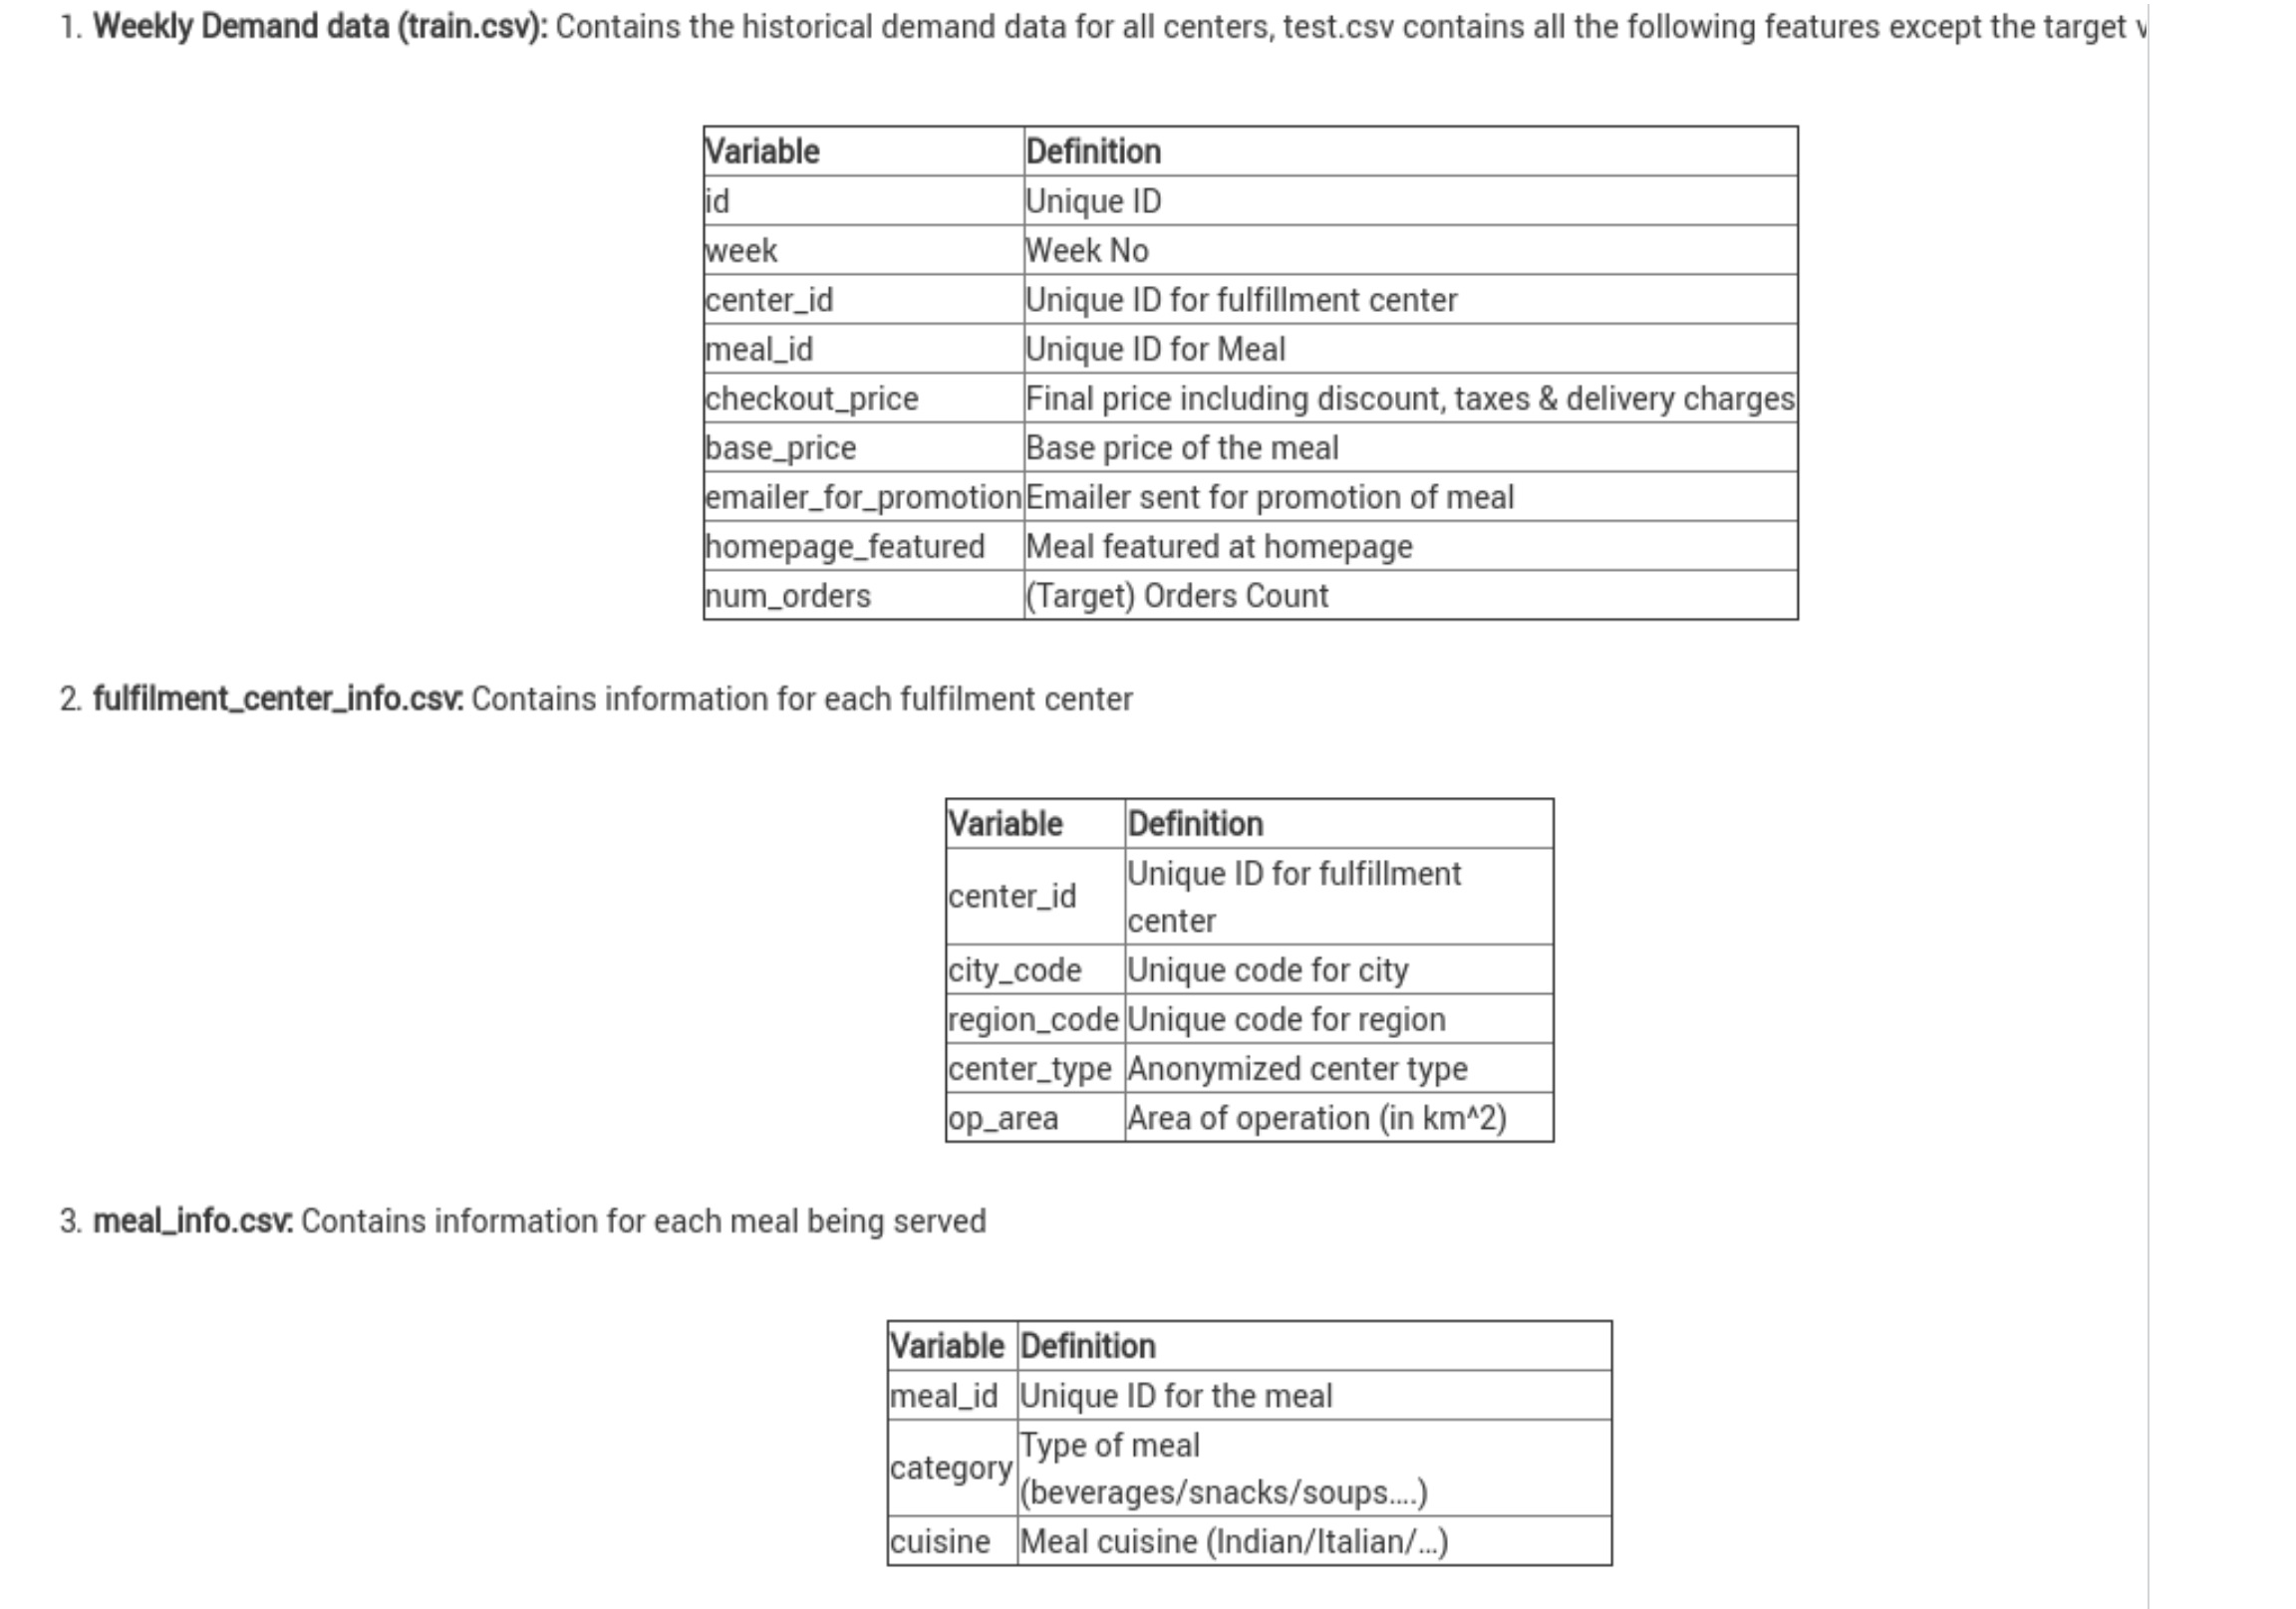

In [12]:
#To check each of the attribute
orders_full.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [13]:
#To check datatypes of each attribute
orders_full.dtypes

id                         int64
week                       int64
center_id                  int64
meal_id                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
dtype: object

In [14]:
#To check null values 
orders_full.isnull().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
city_code                0
region_code              0
center_type              0
op_area                  0
category                 0
cuisine                  0
dtype: int64

In [15]:
#To check shape of the dataset
orders_full.shape

(456548, 15)

In [16]:
#To check unique values 
orders_full.nunique()

id                       456548
week                        145
center_id                    77
meal_id                      51
checkout_price             1992
base_price                 1907
emailer_for_promotion         2
homepage_featured             2
num_orders                 1250
city_code                    51
region_code                   8
center_type                   3
op_area                      30
category                     14
cuisine                       4
dtype: int64

In [17]:
#Getting unique values of each attributes
for i in orders_full.columns:
    print('Number of unique values in {} column are {} \n The unique values are {}'. format(i, len(orders_full[i].unique()), orders_full[i].unique()))
    print('-------------------------------\n')

Number of unique values in id column are 456548 
 The unique values are [1379560 1466964 1346989 ... 1110849 1147725 1361984]
-------------------------------

Number of unique values in week column are 145 
 The unique values are [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145]
-------------------------------

Number of unique values in center_id column are 77 
 The unique values are [ 55  24  11  83  32  13 109  52  93 186 146  57 149  89 124 152  97  74

In [18]:
orders_full.columns

Index(['id', 'week', 'center_id', 'meal_id', 'checkout_price', 'base_price',
       'emailer_for_promotion', 'homepage_featured', 'num_orders', 'city_code',
       'region_code', 'center_type', 'op_area', 'category', 'cuisine'],
      dtype='object')

In [19]:
orders_full.groupby('cuisine')['meal_id'].nunique()

cuisine
Continental    12
Indian         12
Italian        12
Thai           15
Name: meal_id, dtype: int64

In [20]:
# grouped = orders_full.groupby('cuisine')

# for meal_id,cuisine in grouped:
#    print (meal_id)
#    print (cuisine)
    

# Data Visualization

### Understanding Data distribution with Target 

In [21]:
#Importing seaborn and Matplotlib Library
import seaborn as sns
from matplotlib import pyplot as plt

### Data distribution of Every week

<AxesSubplot: ylabel='week'>

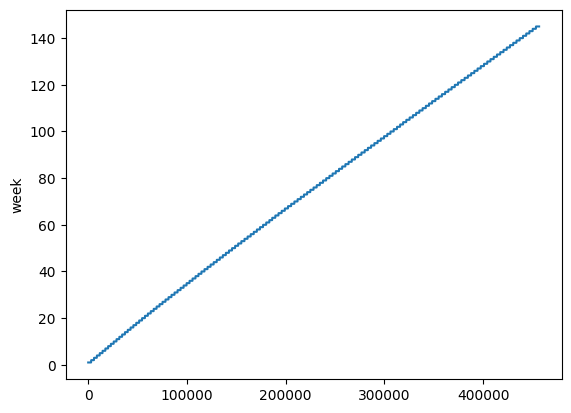

In [50]:
#Data distribution for Every week
sns.lineplot(orders_full['week'])

### Observation: 

1. There seems good seasonality. 
2. 5th and 50th week had good peak sales
3. 62nd week had huge dip in sales. 

In [ ]:
#Number of orders each week 
orders_full.groupby('week')['num_orders'].mean()

### Data distribution of Center_id

In [ ]:
#Data distribution of Center_id
sns.lineplot(orders_full['center_id'],orders_full['num_orders'])


### Target attribute distribution

In [ ]:
#To understand Target attribute distribution(Number of orders)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(orders_full.num_orders)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution")

In [ ]:
#Taking log of target attribute - to view distribution clearly
visu_train = np.sqrt(orders_full['num_orders'])

In [ ]:
#To understand Target attribute distribution(Number of orders) - Transformed data(Log transformation)
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(visu_train)
plt.xlabel("num_orders")
plt.ylabel("Number of Buyers")
plt.title("num_orders Distribution_LogTransfermation")

### Observation: 

1. Target attribute is forming Normal distribution when we have log of data.

## Data distribution for Categorical attributes

In [ ]:
#Plotting distribution for Category, Cuisine, Center_type

plt.figure(3)

plt.subplot(131)
orders_full['category'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Category')

plt.subplot(132)
orders_full['cuisine'].value_counts(normalize=True).plot.bar(figsize = (20,5), title = "Cuisine")

plt.subplot(133)
orders_full['center_type'].value_counts(normalize = True).plot.bar(figsize = (20,5), title = 'Center_type')


### Observation:

1. Bevareges is peak sales item. 

2. Center type A has good demand and sales. 

3. Surprisingly, Center type C is performing better than Type B. 

4. Italian cuisine has more sales than Indian cuisine. 

In [ ]:
#Plotting distribution for Region_wise/Center wise
plt.figure(1)

plt.subplot(231)
orders_full['region_code'].value_counts(normalize = True).plot.bar(figsize = (20,10), title = 'Region_wise')

## Observation:

1. Center  # 56 is best performing center. 
2. More investigation is required on each region. 

### Data Distribution for Cuisines

### Italian cuisine distribution

In [ ]:
#To get Italian cuisine and understand the distributin
italian_cuisine = orders_full[orders_full['cuisine'] == 'Italian']

In [ ]:
#Data distribution of Italian cuisine
italian_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Surprisingly, Italian cusine has more sales of Sandwitch than Pasta
2. Pasta is not demanding item. 
3. Salad has good demand. 

### Indian cuisine distribution

In [ ]:
#To get Italian cuisine and understand the distributin
indian_cuisine = orders_full[orders_full['cuisine'] == 'Indian']

In [ ]:
#Data distribution of Italian cuisine
indian_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation: 

1. Rice Bowl is obvious option.
2. Biryani is not preferred option from client business. 

### Thai cuisine distribution

In [ ]:
#To get Italian cuisine and understand the distributin
Thai_cuisine = orders_full[orders_full['cuisine'] == 'Thai']

In [ ]:
#Data distribution of Italian cuisine
Thai_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Beverages is preferred food in Thai cuisine. 
2. Other snacks is major contributor in overall sales. 

### Continental cuisine distribution

In [ ]:
#To get Italian cuisine and understand the distributin
Continental_cuisine = orders_full[orders_full['cuisine'] == 'Continental']

In [ ]:
#Data distribution of Italian cuisine
Continental_cuisine.groupby('category')['num_orders'].mean().plot.bar()

### Observation:

1. Pizza is highly demanding food in Continental cuisine.
2. Beverages and seafood also has good demand. 

# More analysis if required based on client demand

#  Subsetting data for Center_id()

### Subset data 

In [23]:
#Extracting required attributes 
orders_data = orders_full[['week','meal_id','num_orders','center_id']]

In [24]:
orders_data['cuisine'] = orders_full[['cuisine']]

C:\Users\varap\AppData\Local\Temp\ipykernel_14824\3871641372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_data['cuisine'] = orders_full[['cuisine']]


In [25]:
#To view the subset data
orders_data.head(3)

,week,meal_id,num_orders,center_id,cuisine
0,1,1885,177,55,Thai
1,1,1993,270,55,Thai
2,1,2539,189,55,Thai


In [26]:
orders_data.to_csv('orders_data.csv')

### Center_id and meal_id distribution details

In [27]:
#Data distribution of meal_id for each center_id
center_meal_count = orders_data.groupby('center_id')['meal_id'].nunique()

In [28]:
#To understand meal_id summary
center_meal_count.describe()

count    77.000000
mean     46.714286
std       3.255995
min      39.000000
25%      45.000000
50%      45.000000
75%      50.000000
max      51.000000
Name: meal_id, dtype: float64

Text(0, 0.5, 'meal_id')

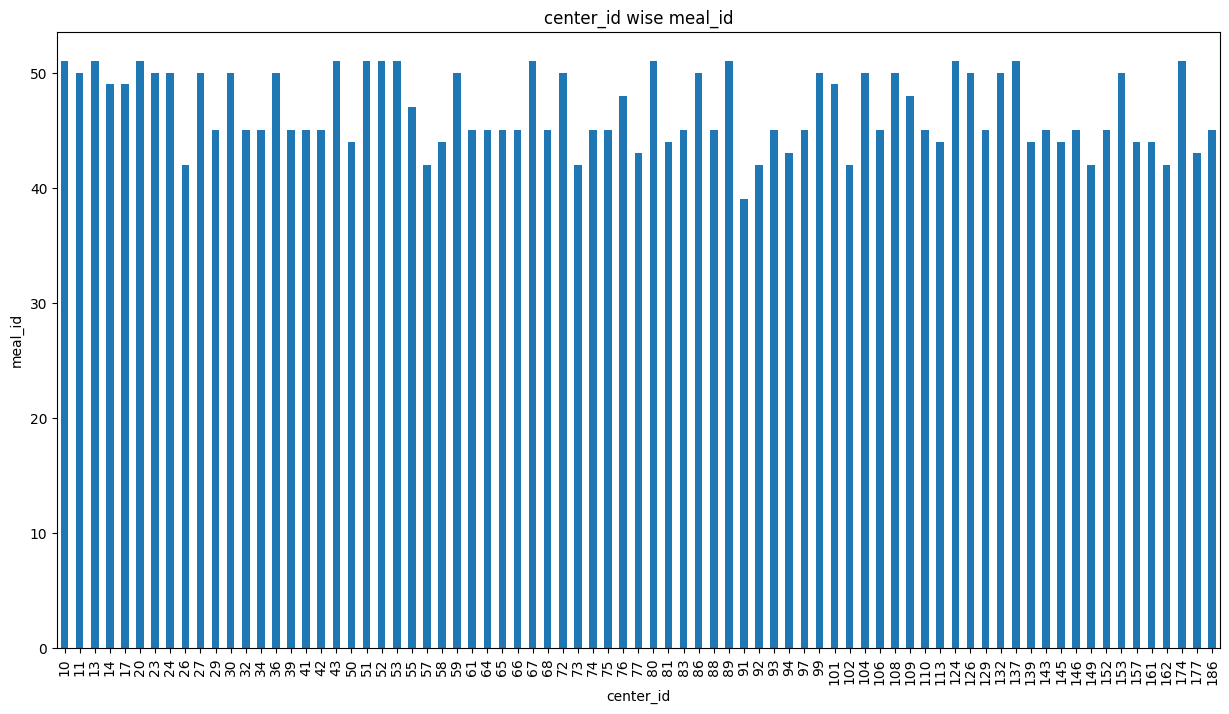

In [29]:
#To get plot on center meal combo distribution
orders_data.groupby('center_id')['meal_id'].nunique().plot.bar(figsize = (15,8), title = 'center_id wise meal_id')
plt.ylabel("meal_id")

### Observation
* All centers having more than 45 meal_ids except center_id(93) which has got 35 meal_ids

In [30]:
orders_data.nunique()

week           145
meal_id         51
num_orders    1250
center_id       77
cuisine          4
dtype: int64

In [31]:
#To view list of center_id
np.unique(orders_data['center_id']).T

array([ 10,  11,  13,  14,  17,  20,  23,  24,  26,  27,  29,  30,  32,
        34,  36,  39,  41,  42,  43,  50,  51,  52,  53,  55,  57,  58,
        59,  61,  64,  65,  66,  67,  68,  72,  73,  74,  75,  76,  77,
        80,  81,  83,  86,  88,  89,  91,  92,  93,  94,  97,  99, 101,
       102, 104, 106, 108, 109, 110, 113, 124, 126, 129, 132, 137, 139,
       143, 145, 146, 149, 152, 153, 157, 161, 162, 174, 177, 186],
      dtype=int64)

In [32]:
#To subset center_id = 66
order_data_55 = orders_data[orders_data['center_id'] == 55]

In [33]:
#To view list of meal_id in center_id = 66 
np.unique(order_data_55['meal_id']).T

array([1062, 1109, 1198, 1207, 1216, 1230, 1247, 1248, 1311, 1445, 1525,
       1543, 1558, 1571, 1727, 1754, 1770, 1778, 1803, 1878, 1885, 1902,
       1962, 1971, 1993, 2126, 2139, 2290, 2304, 2306, 2322, 2444, 2490,
       2492, 2539, 2569, 2577, 2581, 2631, 2640, 2664, 2704, 2707, 2760,
       2826, 2867, 2956], dtype=int64)

In [34]:
order_data_55['meal_id']

0         1885
1         1993
2         2539
3         2139
4         2631
          ... 
453310    1543
453311    2304
453312    2664
453313    2569
453314    2490
Name: meal_id, Length: 5146, dtype: int64

In [35]:
##To subset meal_id = 1885
order_data_55_1062 = order_data_55[order_data_55['meal_id']==1062]

In [36]:
#To view the data after subset
order_data_55_1062.head(3)

,week,meal_id,num_orders,center_id,cuisine
7,1,1062,391,55,Italian
2928,2,1062,271,55,Italian
5824,3,1062,162,55,Italian


In [37]:
order_data_55_1062.nunique()

week          145
meal_id         1
num_orders     69
center_id       1
cuisine         1
dtype: int64

### Observation
* Meal_id 1062 is belogs to Italian cusine and 'Beverages' category

## Creating date attribute - To use Time series models

In [38]:
#Creating date attribute - To use Time series models
df_sr = pd.Series(pd.date_range(start='2001-01-01', periods=len(order_data_55_1062), freq='W'))

In [39]:
#Creating weekly sequence data
re = df_sr.dt.week

C:\Users\varap\AppData\Local\Temp\ipykernel_14824\3775134928.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  re = df_sr.dt.week


In [40]:
#To view sequence data
re

0       1
1       2
2       3
3       4
4       5
       ..
140    37
141    38
142    39
143    40
144    41
Length: 145, dtype: int64

In [41]:
#To concat date attribute with sequence data
new = pd.concat([df_sr,re], axis=1)

In [42]:
#To rename index with proper column name - date and week component 
new_data = new.rename(columns = {0:"ds", 1:"week"})

In [43]:
#To view after renaming
new_data.head(3)

,ds,week
0,2001-01-07,1
1,2001-01-14,2
2,2001-01-21,3


In [44]:
#To merge date attribute with data set
timeseries_data = pd.merge(new_data,order_data_55_1062, how = 'left', on = 'week')

In [45]:
#To view after merging
timeseries_data.head(3)

,ds,week,meal_id,num_orders,center_id,cuisine
0,2001-01-07,1,1062,391,55,Italian
1,2001-01-14,2,1062,271,55,Italian
2,2001-01-21,3,1062,162,55,Italian


# Time series Model Building

In [54]:
#Importing statsmodel Library - which helps in time series
import statsmodels.api as sm

### Decompose the timeseries

<AxesSubplot: xlabel='ds', ylabel='num_orders'>

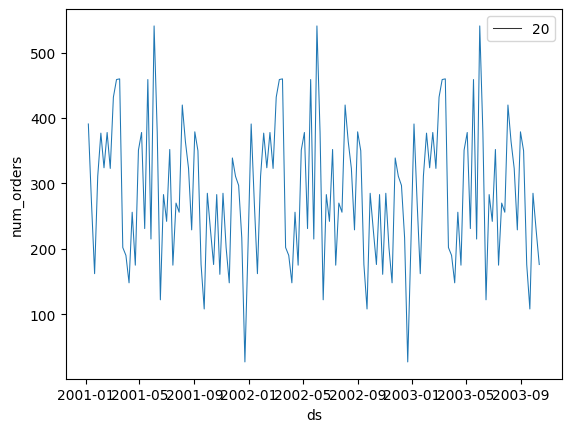

In [55]:
#To view distribution of order details with time frame
sns.lineplot(x="ds", y="num_orders",legend = 'full' , data=timeseries_data, size=20)

<Figure size 640x480 with 0 Axes>

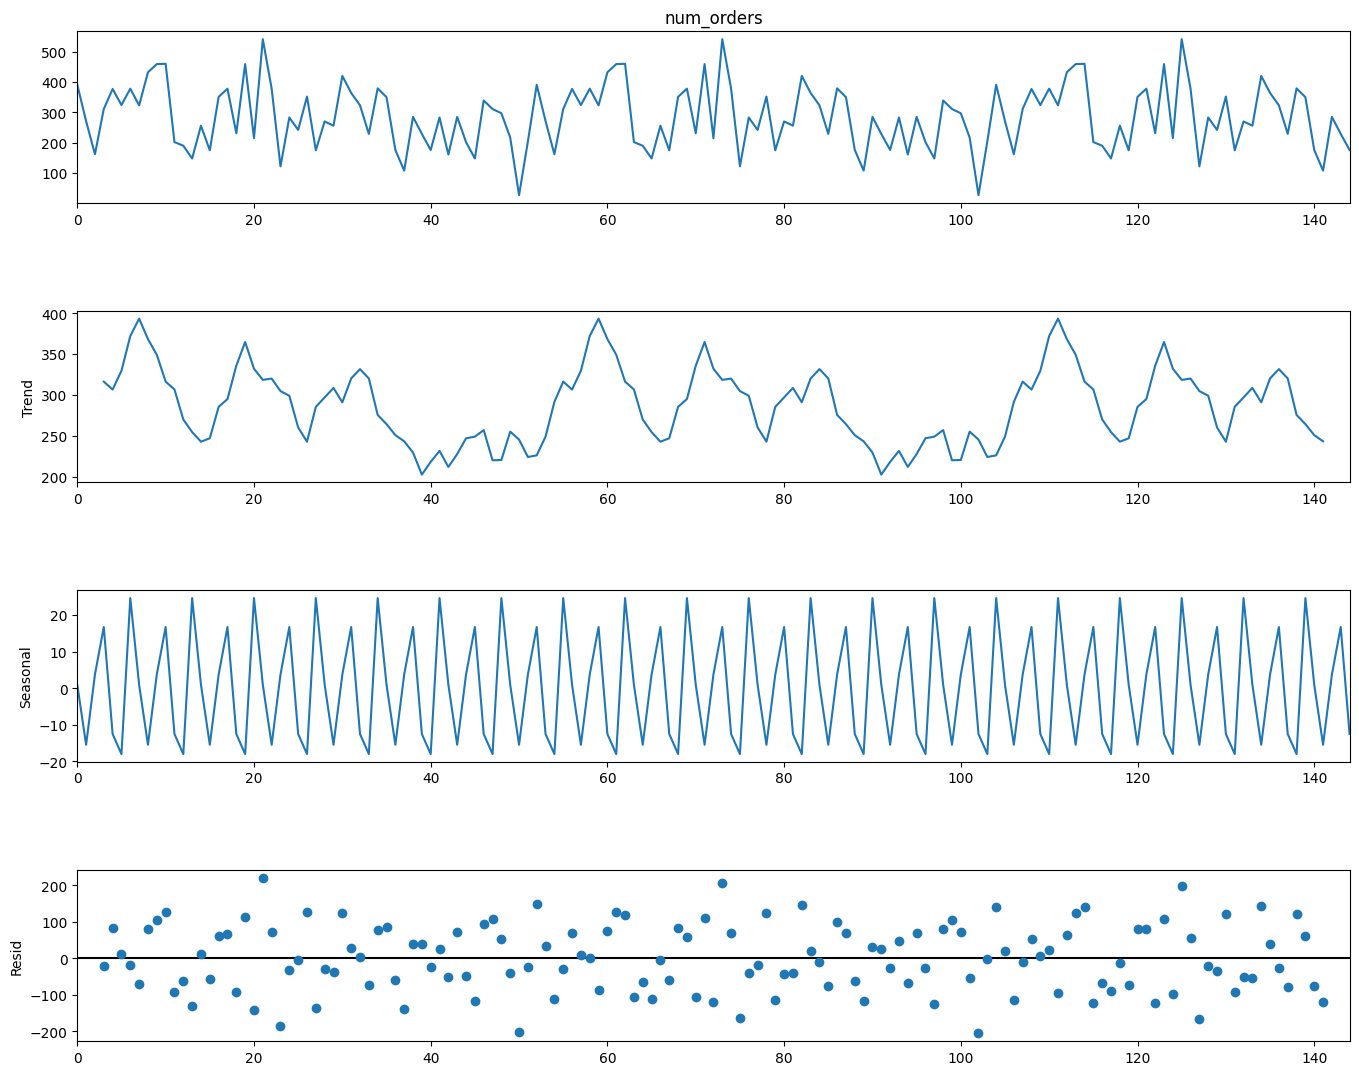

In [94]:
#Decompose the time series data
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(timeseries_data['num_orders'], model = 'additive', period=7)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)

In [95]:
#Creating function for ploting stationarity

from statsmodels.tsa.stattools import adfuller
    
def test_stationarity(timeseries, window = 12, cutoff = 0.01):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window).mean()
    rolstd = timeseries.rolling(window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC', maxlag = 20 )
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    pvalue = dftest[1]
    if pvalue < cutoff:
        print('p-value = %.4f. The series is likely stationary.' % pvalue)
    else:
        print('p-value = %.4f. The series is likely non-stationary.' % pvalue)
    
    print(dfoutput)

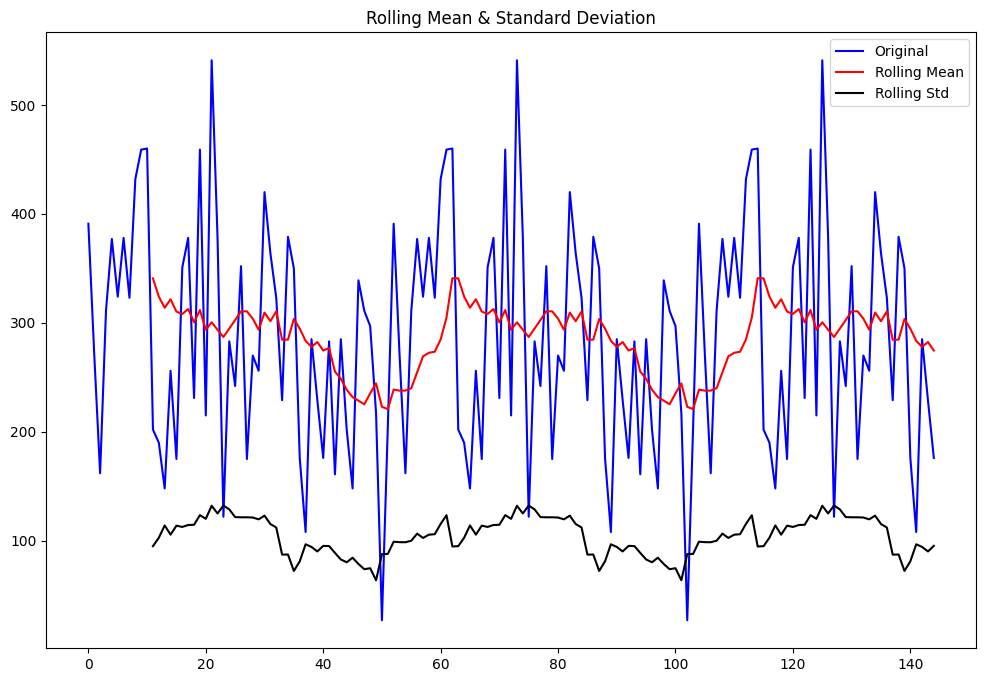

Results of Dickey-Fuller Test:
p-value = 0.0555. The series is likely non-stationary.
Test Statistic                  -2.819859
p-value                          0.055493
#Lags Used                      20.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


In [96]:
#Calling stationarity function
test_stationarity(timeseries_data['num_orders'])

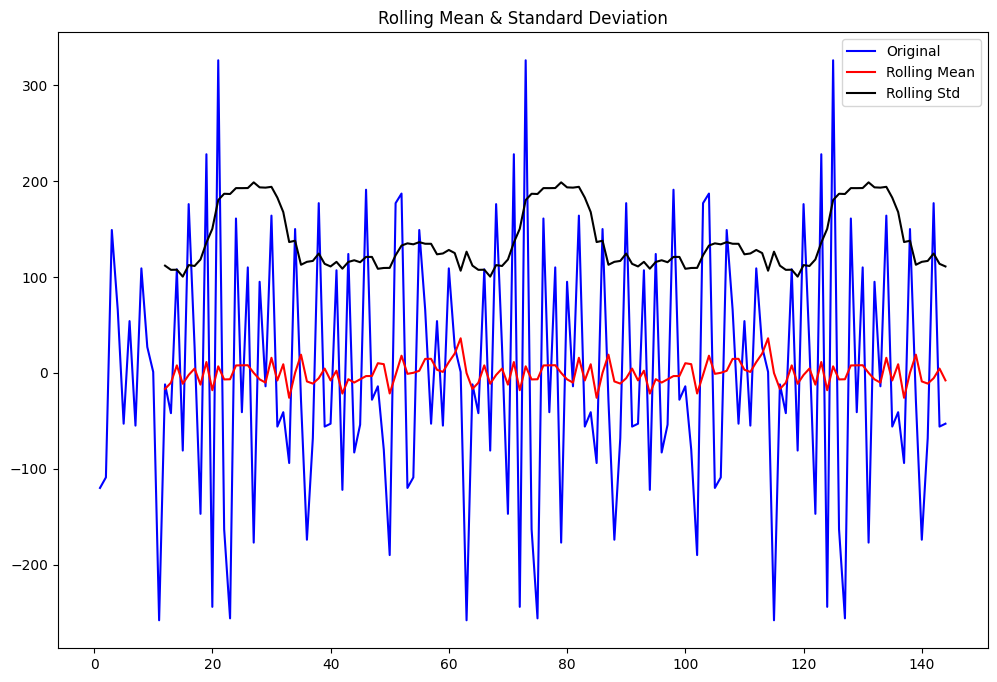

Results of Dickey-Fuller Test:
p-value = 0.0027. The series is likely stationary.
Test Statistic                  -3.824892
p-value                          0.002663
#Lags Used                      20.000000
Number of Observations Used    123.000000
Critical Value (1%)             -3.484667
Critical Value (5%)             -2.885340
Critical Value (10%)            -2.579463
dtype: float64


In [97]:
#Doing first order difference

first_diff = timeseries_data.num_orders - timeseries_data.num_orders.shift(1)
first_diff = first_diff.dropna(inplace = False)
test_stationarity(first_diff)

C:\Users\varap\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


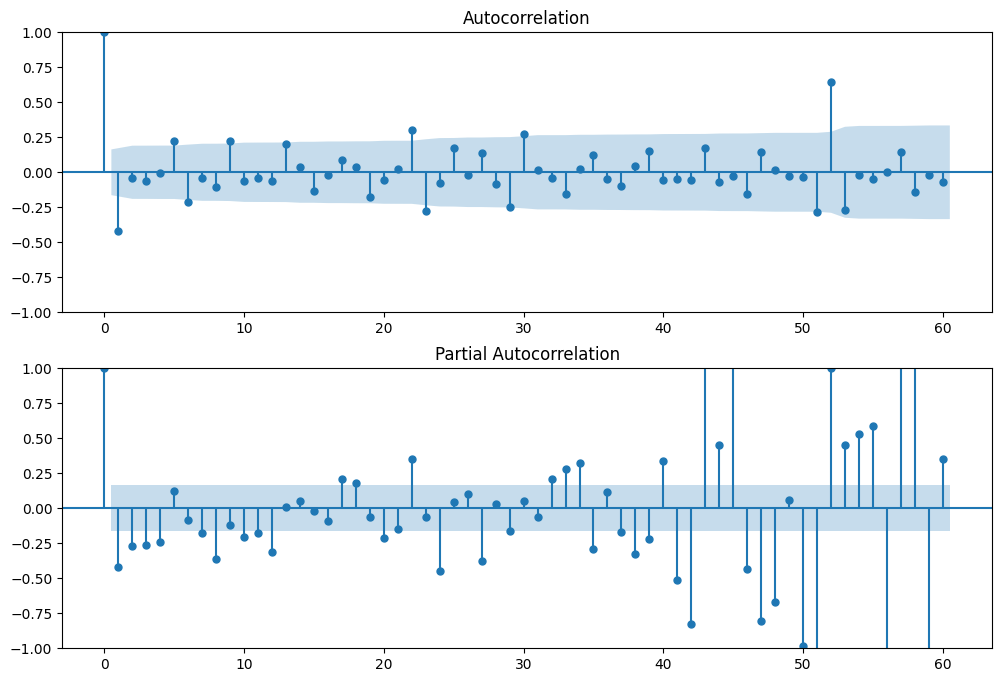

In [98]:
#Plotting ACF, PACF plot  - Differenced data

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(first_diff, lags=60, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(first_diff, lags=60, ax=ax2)# 

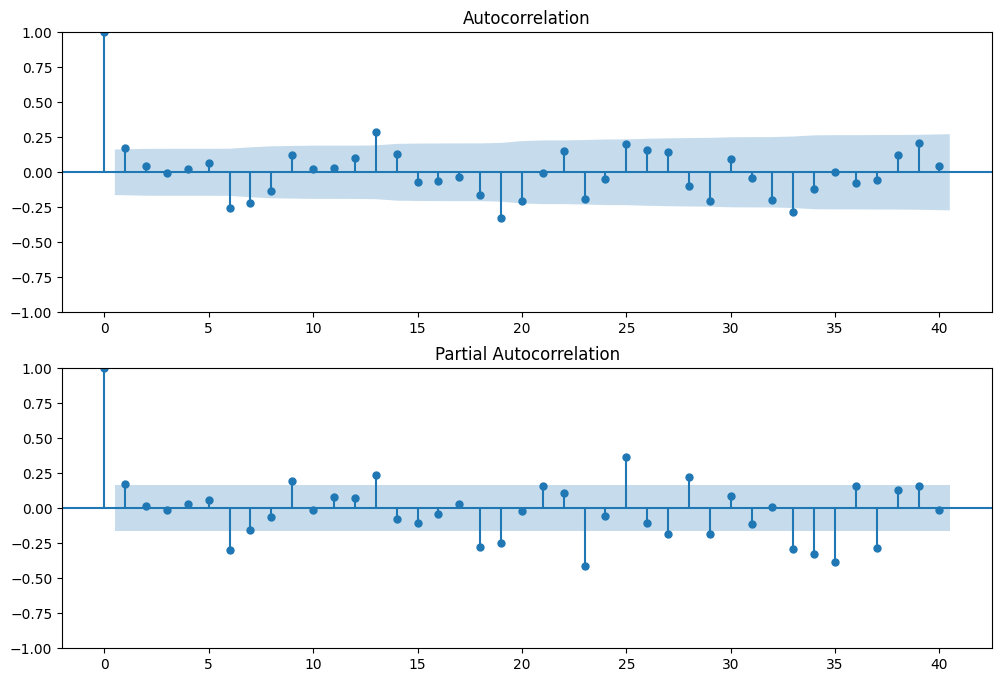

In [99]:
#Plotting ACF, PACF plot  - Original data
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(timeseries_data.num_orders, lags=40, ax=ax1) # 
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(timeseries_data.num_orders, lags=40, ax=ax2)# 

In [101]:
#Building ARIMA model
df_raw = df.drop([0])
arima_mod6 = sm.tsa.ARIMA(timeseries_data.num_orders, (3,1,0)).fit(disp=False)
print(arima_mod6.summary())

NameError: name 'df' is not defined

In [ ]:
#Train Test split
train = timeseries_data[:130]
val = timeseries_data[130:]

In [ ]:
#Finding shape of train and validation data set
print(train.shape)
print(val.shape)

In [ ]:
#Forecasting on Validation Data set
start_index = 130
end_index = 144
timeseries_data['forecast_Ar'] = arima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
timeseries_data[start_index:end_index][['num_orders', 'forecast_Ar']].plot(figsize=(12, 8))

### The difference between Actual and forecast is high

## Analyze the result

In [ ]:
from scipy import stats
from scipy.stats import normaltest

resid = arima_mod6.resid
print(normaltest(resid))
# returns a 2-tuple of the chi-squared statistic, and the associated p-value. the p-value is very small, meaning
# the residual is not a normal distribution

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')

plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)

## Observation:

The graph looks very like a normal distribution. But it failed the P value test. 

Also we see a recurring correlation exists in both ACF and PACF. So we need to deal with seasonality

### Metrics to evaluate-- MAPE

In [ ]:
#Function to find MAPE
def smape_mape(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [ ]:
smape_mape(timeseries_data[130:144]['num_orders'],timeseries_data[130:144]['forecast_Ar'])

In [ ]:
timeseries_data[130:144]['forecast_Ar'].values

In [ ]:
#Defining date for future forecast
start_index = 2003-10-19
end_index = 2003-12-9

In [ ]:
#Forecasting on furture 10 weeks 
Arima_forecast = arima_mod6.forecast(10)

In [ ]:
Arima_forecast

In [ ]:
Arima_output = [184.09688645, 213.43893587, 204.20635432, 194.0263202 ,
        194.77024076, 199.13285561, 197.0853508 , 194.64774038,
        194.14349818, 194.26433256]

In [63]:
Arima_output = pd.DataFrame(Arima_output)

NameError: name 'Arima_output' is not defined

In [64]:
Arima_output.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

NameError: name 'Arima_output' is not defined

## Handling seasonality by SARIMA model

In [65]:
sarima_mod6 = sm.tsa.statespace.SARIMAX(timeseries_data.num_orders, trend='n', order=(1,1,0), seasonal_order=(1, 0, 0, 52),  initialization='approximate_diffuse').fit()
print(sarima_mod6.summary())

C:\Users\varap\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


                                     SARIMAX Results                                      
Dep. Variable:                         num_orders   No. Observations:                  145
Model:             SARIMAX(1, 1, 0)x(1, 0, 0, 52)   Log Likelihood                 163.963
Date:                            Tue, 07 Mar 2023   AIC                           -321.927
Time:                                    08:49:44   BIC                           -312.996
Sample:                                         0   HQIC                          -318.298
                                            - 145                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7074      0.126     -5.619      0.000      -0.954      -0.461
ar.S.L52       1.0000   3.36e-07   

### Analysis the residuls

In [66]:
resid = sarima_mod6.resid
print(normaltest(resid))

fig = plt.figure(figsize=(12,8))
ax0 = fig.add_subplot(111)

sns.distplot(resid ,fit = stats.norm, ax = ax0) # need to import scipy.stats

# Get the fitted parameters used by the function
(mu, sigma) = stats.norm.fit(resid)

#Now plot the distribution using 
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')
plt.title('Residual distribution')


# ACF and PACF
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(arima_mod6.resid, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(arima_mod6.resid, lags=40, ax=ax2)


NameError: name 'normaltest' is not defined

## Prediction with SARIMA model

In [ ]:
start_index = 130
end_index = 144
timeseries_data['forecast'] = sarima_mod6.predict(start = start_index, end= end_index, dynamic= True)  
timeseries_data[start_index:end_index][['num_orders', 'forecast']].plot(figsize=(12, 8))

In [ ]:
timeseries_data.tail()

## Observation: 

1. Y-actual(validation Dataset) and forecasted values are same. 

2. Data points are exactly overlapping. 

In [ ]:
#Function to find MAPE
def smape_mape(y_true, y_pred):
    mape = np.mean(abs((y_true-y_pred)/y_true))*100
    smape = np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true))).fillna(0))
    print('MAPE: %.2f %% \nSMAPE: %.2f'% (mape,smape), "%")

In [ ]:
#Finding MAPE for validation dataset
smape_mape(timeseries_data[130:144]['num_orders'],timeseries_data[130:144]['forecast'])

In [ ]:
timeseries_data[130:144]['num_orders'].values

In [ ]:
timeseries_data[130:144]['forecast'].values

In [ ]:
#Defining date for future forecast
start_index = 2003-10-19
end_index = 2003-12-9

In [ ]:
#Forecasting on furture 10 weeks 
sarima_mod6.forecast(steps = 10,exog = timeseries_data[start_index:end_index])

In [ ]:
Sarima_forecast = sarima_mod6.forecast(steps = 10,exog = timeseries_data[start_index:end_index])

In [ ]:
Sarima_forecast = pd.DataFrame(Sarima_forecast)

In [ ]:
Sarima_forecast.rename(columns={0:"Num_orders"})

In [ ]:
Sarima_forecast.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

In [ ]:
print(timeseries_data['forecast'].min())
print(timeseries_data['forecast'].max())

In [67]:
print(Sarima_forecast.min())
print(Sarima_forecast.max())

NameError: name 'Sarima_forecast' is not defined

### SARIMA Model insights

Number of orders are in between 107 to 419 as per validation forecast 

But as per SARIMA model prediction the number of orders are between 27 to 338 for future dates.

Only num_orders variable is used to build SARIMA Model so prediction may not be accurate.


# LSTM model

In [68]:
#Loading required libraries
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM


In [69]:
#Creating lstm data frame for model building 
lstm_df = timeseries_data

In [70]:
#To view the lstm data frame
lstm_df.head(2)

,ds,week,meal_id,num_orders,center_id,cuisine
0,2001-01-07,1,1062,391,55,Italian
1,2001-01-14,2,1062,271,55,Italian


### LSTM Input Data

In [71]:
#creating dataframe
data = lstm_df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(lstm_df)),columns=['ds', 'num_orders'])
for i in range(0,len(data)):
    new_data['ds'][i] = data['ds'][i]
    new_data['num_orders'][i] = data['num_orders'][i]

In [72]:
#To view created data frame
new_data.head(2)

,ds,num_orders
0,2001-01-07 00:00:00,391
1,2001-01-14 00:00:00,271


In [73]:
#setting index
new_data.index = new_data.ds
new_data.drop('ds', axis=1, inplace=True)


In [74]:
#creating train and test sets
dataset = new_data.values

train = dataset[0:130,:]
valid = dataset[130:,:]

In [75]:
#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(30,len(train)):
    x_train.append(scaled_data[i-30:i,0])
    y_train.append(scaled_data[i,0])


### LSTM Train Test Split 

In [76]:
#Train and Test split of data

x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

### LSTM Model building

In [77]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
history=model.fit(x_train, y_train, epochs=3, batch_size=32, verbose=2,validation_split=0.1)


Epoch 1/3
3/3 - 13s - loss: 0.2418 - val_loss: 0.1856 - 13s/epoch - 4s/step
Epoch 2/3
3/3 - 0s - loss: 0.0935 - val_loss: 0.0595 - 209ms/epoch - 70ms/step
Epoch 3/3
3/3 - 0s - loss: 0.0588 - val_loss: 0.0767 - 217ms/epoch - 72ms/step


## Visualizating Prediction output

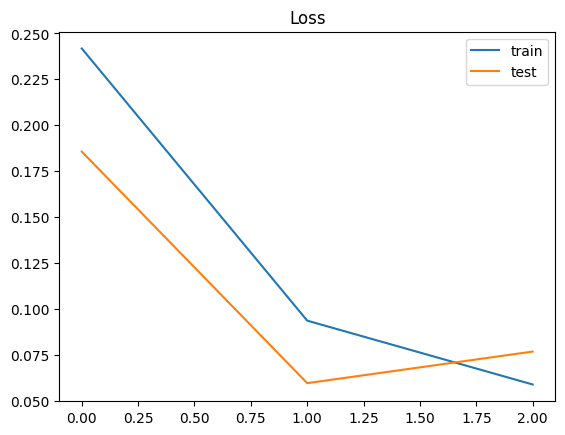

In [78]:
#Plotting Loss history
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

In [79]:
#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 30 :].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(30,inputs.shape[0]):
    X_test.append(inputs[i-30:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
pred_num_order = model.predict(X_test)
pred_num_order = scaler.inverse_transform(pred_num_order)

1/1 [==============================] - 2s 2s/step


### Model Performance

In [80]:
#Calculating RMSE 
rms=np.sqrt(np.mean(np.power((valid-pred_num_order),2)))
rms

152.00248248694965

In [81]:
#Calculating MAPE
mape = np.mean(abs((valid-pred_num_order)/valid))*100
mape

66.80836463997043

C:\Users\varap\AppData\Local\Temp\ipykernel_14824\2019510211.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = pred_num_order


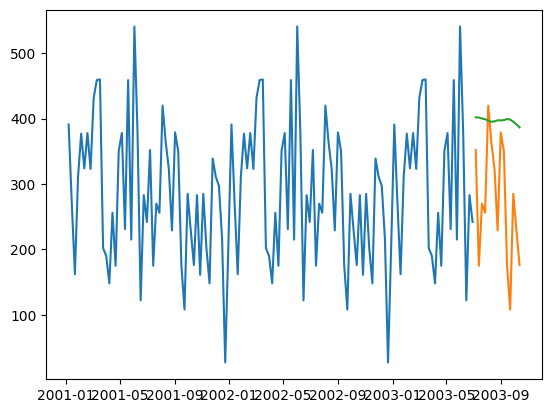

In [82]:
#for plotting
train = new_data[:130]
valid = new_data[130:]
valid['Predictions'] = pred_num_order
plt.plot(train['num_orders'])
plt.plot(valid[['num_orders','Predictions']])

In [83]:
#Creating a function to get future date

def moving_test_window_preds(n_future_preds):

    ''' n_future_preds - Represents the number of future predictions we want to make
                         This coincides with the number of windows that we will move forward
                         on the test data
    '''
    preds_moving = []                                  # Use this to store the prediction made on each test window]
    moving_test_window = [X_test[0,:].tolist()]        # Creating the first test window]
    moving_test_window = np.array(moving_test_window)    # Making it an numpy array
    
    for i in range(n_future_preds):
        preds_one_step = model.predict(moving_test_window) # Note that this is already a scaled prediction so no need to rescale this
        preds_moving.append(preds_one_step[0,0]) # get the value from the numpy 2D array and append to predictions
        preds_one_step = preds_one_step.reshape(1,1,1) # Reshaping the prediction to 3D array for concatenation with moving test window
        moving_test_window = np.concatenate((moving_test_window[:,1:, :], preds_one_step), axis=1) # This is the new moving test window, where the first element from the window has been removed and the prediction  has been appended to the end
        
    return preds_moving


In [84]:
#Forecasting for 10 week data
preds_moving = moving_test_window_preds(10)

1/1 [==============================] - 0s 47ms/step


In [85]:
preds_moving

[0.7294403,
 0.73060846,
 0.73513424,
 0.7438367,
 0.75237024,
 0.7605812,
 0.77152634,
 0.7845565,
 0.79660183,
 0.80852824]

In [86]:
#Converting to DataFrame
preds_moving = pd.DataFrame(preds_moving)

In [87]:
#Inverse transformation of sclaed data to get prediction
preds_moving1 = scaler.inverse_transform(preds_moving)  

In [88]:
preds_moving1

array([[401.93228],
       [402.53275],
       [404.85898],
       [409.33206],
       [413.7183 ],
       [417.93872],
       [423.5645 ],
       [430.26202],
       [436.45334],
       [442.5835 ]], dtype=float32)

In [89]:
preds_moving1 = pd.DataFrame(preds_moving1)

Text(0.5, 1.0, 'Forecast for next 10 weeks')

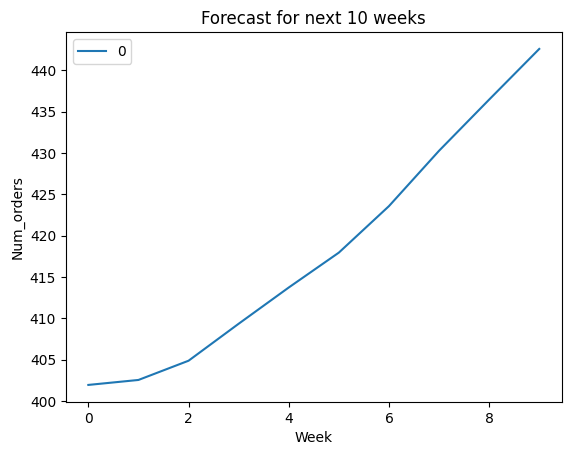

In [90]:
preds_moving1.plot()
plt.xlabel('Week')
plt.ylabel('Num_orders')
plt.title('Forecast for next 10 weeks')

In [91]:
print(preds_moving1.min())
print(preds_moving1.max())

0    401.932281
dtype: float32
0    442.583496
dtype: float32
